In [41]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import networkx as nx
import powerlaw

import collections
import random
import math
import heapq

## Generating the circle

In [11]:
# Setting the parameters of the circle

t = np.array(range(0,int(round(2*math.pi, 3)*100000)))/100000
r = 1
a = 0
b = 0

# Creating a circle

x = r * np.array([math.cos(i) for i in t]) + a

y = r * np.array([math.sin(i) for i in t]) + b

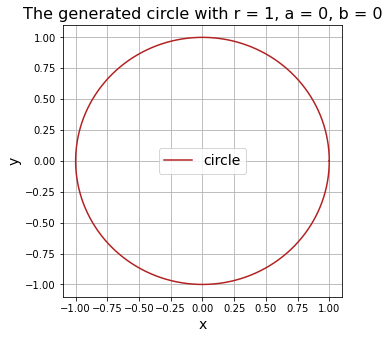

In [12]:
# Plotting the circle

plt.figure(figsize = (5,5))
plt.plot(x,y, color = 'firebrick', label = 'circle')

plt.title('The generated circle with r = ' + str(r) + ', a = ' + str(a) + ', b = ' + str(b), fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

plt.legend(fontsize = 14)
plt.grid()
plt.show()

## Generating and adding nodes to the circle

In [30]:
# Setting the number of connections

m = 2

# Setting the number of points to generate at first 

num_nodes_to_generate_first = 1

# Creating lists to save the generated coordinates

generated_coordinates = []

# Saving all the generated numbers in a list

generated_random_nums = []

# Generating random numbers and placing them in the circle

for i in range(0,num_nodes_to_generate_first):

    #random index
    random_index = random.randint(0,len(x))
    generated_random_nums.append(random_index)

    #saving the generated coordinates into a dictionary
    temp = [x[random_index], y[random_index]]
    generated_coordinates.append((temp, (i+1), -999))

In [31]:
# Adding new nodes, calculating the distances and 

new_num_nodes_to_generate = 1000

# Generating random numbers and placing them in the circle

for i in range(0,new_num_nodes_to_generate):
    
    #random index
    while random_index in generated_random_nums:
        random_index = random.randint(0,len(x))
        
    generated_random_nums.append(random_index)
    temp = [x[random_index], y[random_index]]
    
    #creating temp list for the thetas
    thetas_temp_list = []
    
    #measuring the distance between the new node and all the previous nodes
    for j in range(0,len(generated_coordinates)):
        dist = np.linalg.norm(np.array(generated_coordinates[j][0])-np.array(temp))
        
        #saving the theta values in a list
        thetas_temp_list.append((j+1)*math.asin(dist/(2*r))*2)
    
    #taking the min of angles and getting the closest node
    #closest_node = thetas_temp_list.index(min(thetas_temp_list)) + 1
    min_theta_values_m = heapq.nsmallest(m, thetas_temp_list)
    
    for k in min_theta_values_m:
        closest_node = thetas_temp_list.index(k) + 1
        #appending the new node to the generated coordinates
        generated_coordinates.append((temp, (num_nodes_to_generate_first + i + 1), closest_node))

## Plotting the results of the circle with nodes

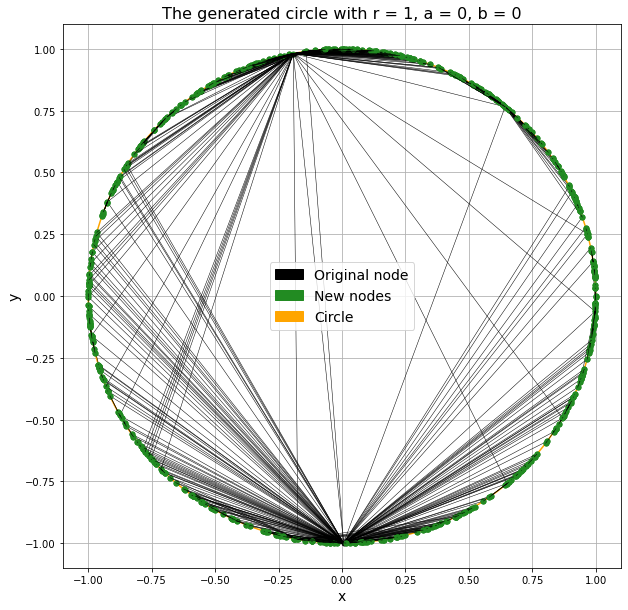

In [32]:
# Plotting the circle with the generated points

plt.figure(figsize = (10,10))

# Plotting the circle
plt.plot(x,y, color = 'orange')

# Plotting the original nodes
for i in range(0,num_nodes_to_generate_first):
    plt.plot(generated_coordinates[i][0][0], generated_coordinates[i][0][1], 'o', color = 'black', markersize = 5)
    
# Plotting the newly connected nodes
for i in range(num_nodes_to_generate_first, num_nodes_to_generate_first + new_num_nodes_to_generate):
    plt.plot(generated_coordinates[i][0][0], generated_coordinates[i][0][1], 'o', color = 'forestgreen', markersize = 5)
    plt.plot([generated_coordinates[i][0][0], generated_coordinates[generated_coordinates[i][2]-1][0][0]], [generated_coordinates[i][0][1], generated_coordinates[generated_coordinates[i][2]-1][0][1]], color = 'black', linewidth = 0.5)

# Setting the title and labels
plt.title('The generated circle with r = ' + str(r) + ', a = ' + str(a) + ', b = ' + str(b), fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

# Setting the legend
orig_nodes_patch = mpatches.Patch(color='black', label='Original node')
new_nodes_patch = mpatches.Patch(color='forestgreen', label='New nodes')
circle_patch = mpatches.Patch(color='orange', label='Circle')
plt.legend(handles=[orig_nodes_patch, new_nodes_patch, circle_patch], fontsize = 14)

# Setting the grid
plt.grid()
plt.show()

## Generating a corresponding network

In [33]:
# Getting the nodes and edges from the generated data set

nodes = [generated_coordinates[i][1] for i in range(0,len(generated_coordinates))]
edges = [generated_coordinates[i][2] for i in range(1,len(generated_coordinates))]

In [34]:
# Creating the graph

circle_graph = nx.Graph()

# Adding the nodes

for i in range(0,len(nodes)):
    circle_graph.add_node(nodes[i])
    
# Adding the weights

for i in range(1,len(nodes)):
    circle_graph.add_edge(nodes[i], edges[i-1])

In [35]:
# Plotting the graph

#plt.figure(figsize = (9,9))

# Setting the layout

#pos_cust = nx.kamada_kawai_layout(circle_graph)

# Drawing the graph

#nx.draw(circle_graph, pos = pos_cust, node_color = 'forestgreen', node_size=10, width = 0.5)

#plt.savefig('flights_graph.jpg', dpi=600)

## Calculating and plotting the k - attractiveness function

In [42]:
# Degree distribution, connections, power law fit and a constant

k = np.array(nx.degree(circle_graph)).T[1]
m = 2

fit = powerlaw.Fit(k)
gamma = fit.power_law.alpha

A = (gamma-2)*m

# Attractiveness

p_attr = []

for i in range(0,len(k)):
    p_attr.append(m * (k[i] - m + A) / ((i+1) * (m + A)))

Calculating best minimal value for power law fit
C:\Users\Domonkos\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [43]:
# Creating res dict for the values

res = {p_attr[i]: k[i] for i in range(len(p_attr))}

# Calculating the mean values of same degree nodes

new_values_k = []
new_keys_attr = []

for i in range(0,max(k)):
    
    #getting the indices of the same elements
    indices = [l for l, x in enumerate(list(res.values())) if x == i]
    
    #if the indices list is not empty
    if indices != []:
        
        #initialising mean_value
        mean_value = 0
        
        #going through the indices
        for j in range(0,len(indices)):
            mean_value += p_attr[indices[j]]
            
        #getting the mean value of the results
        mean_value = mean_value / len(indices)
        
        #appending the results
        new_values_k.append(mean_value)
        new_keys_attr.append(i)

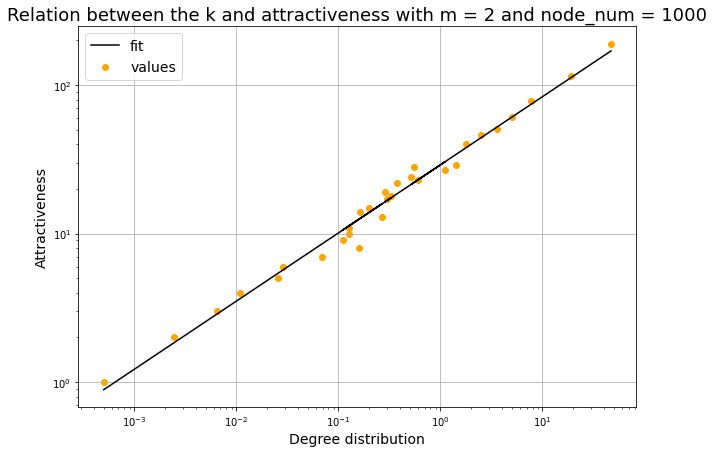

In [44]:
# Fitting on the results

results = np.polyfit(np.log(new_values_k),np.log(new_keys_attr), 1)

# Plotting the k - attractiveness values

plt.figure(figsize = (10,7))

plt.scatter(new_values_k, new_keys_attr, color = 'orange', label = 'values')
plt.plot(np.exp(np.log(np.array(new_values_k))), np.exp(results[0]*np.log(np.array(new_values_k)) + results[1]), color = 'black', label = 'fit')

plt.title('Relation between the k and attractiveness with m = ' + str(m) + ' and node_num = ' + str(new_num_nodes_to_generate), fontsize = 18)
plt.xlabel('Degree distribution', fontsize = 14)
plt.ylabel('Attractiveness', fontsize = 14)

plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 14)
plt.grid()

#plt.savefig('attractiveness_k_m' + str(m) + '_noden' + str(new_num_nodes_to_generate) + '.jpg', dpi = 500)

plt.show()